In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import reshape
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from google.colab import drive

In [ ]:
drive.mount("/content/drive") 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Clean data
data = pd.read_csv('/content/drive/My Drive/ks-projects-201801.csv', engine='python')
data = data.query('state != "live" and state != "undefined"')
data = data.drop(columns=['ID','goal','usd pledged', 'pledged'])
data = data.query('usd_pledged_real < 5000000')
data = data.query('backers > 10')
data = data.query('usd_goal_real < 1000000')

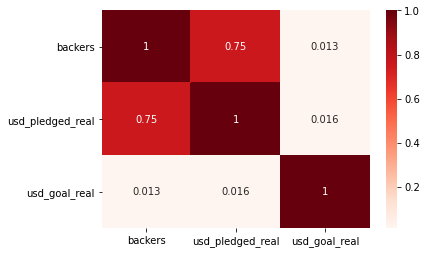

In [ ]:
#Visualize correlation for numeric values
import seaborn as sns
plt.figure()
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Setup Transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

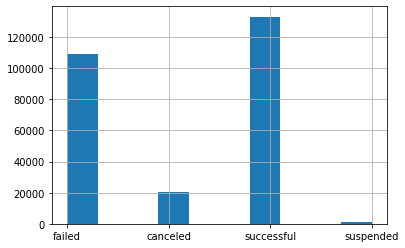

In [ ]:
#Setup data for category vs pledged
x_data = data[['main_category']]
y_data = data[['usd_pledged_real']]

x_transformer = categorical_transformer.fit(x_data)
y_transformer = numeric_transformer.fit(y_data)
x_data = x_transformer.transform(x_data)
y_data = y_transformer.transform(y_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [ ]:
#Solve regression model for category vs pledged
reg = LinearRegression()
reg.fit(x_train,y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))

0.017478069924526385
0.018393188879140876


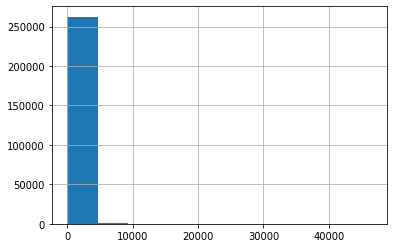

In [ ]:
#Setup data for backers vs pledged
x_data = data[['backers']]
y_data = data[['usd_pledged_real']]

x_transformer = numeric_transformer.fit(x_data)
y_transformer = numeric_transformer.fit(y_data)
x_data = x_transformer.transform(x_data)
y_data = y_transformer.transform(y_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [ ]:
#Solve regression for backers vs pledged
reg = LinearRegression()
reg.fit(x_train,y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))

0.5613577454143293
0.5843585591295023
